###Predicting Survival in the Titanic Data Set

####We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

####You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents children aboard), and Fare to predict whether a passenger survived.

Loading Data and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
url ="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(url)
titanic.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
## using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents children aboard), and Fare to predict whether a passenger survived.

titanic_final = titanic[['Pclass','Sex','Age','SibSp','Fare','Survived']]
titanic_final.head()

Pclass     Sex   Age  SibSp     Fare  Survived
0       3    male  22.0      1   7.2500         0
1       1  female  38.0      1  71.2833         1
2       3  female  26.0      0   7.9250         1
3       1  female  35.0      1  53.1000         1
4       3    male  35.0      0   8.0500         0

In [9]:
titanic_final.describe()

Pclass         Age       SibSp        Fare    Survived
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008   32.204208    0.383838
std      0.836071   14.526497    1.102743   49.693429    0.486592
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    7.910400    0.000000
50%      3.000000   28.000000    0.000000   14.454200    0.000000
75%      3.000000   38.000000    1.000000   31.000000    1.000000
max      3.000000   80.000000    8.000000  512.329200    1.000000

In [10]:
## Age contains null values .. 
titanic_final['Age'].fillna(titanic_final['Age'].mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [11]:
titanic_final.describe()

Pclass         Age       SibSp        Fare    Survived
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   28.566970    0.523008   32.204208    0.383838
std      0.836071   13.199572    1.102743   49.693429    0.486592
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    7.910400    0.000000
50%      3.000000   24.000000    0.000000   14.454200    0.000000
75%      3.000000   35.000000    1.000000   31.000000    1.000000
max      3.000000   80.000000    8.000000  512.329200    1.000000

In [12]:
trainDfDummies = pd.get_dummies(titanic_final, columns=['Sex'])
trainDfDummies

Pclass   Age  SibSp     Fare  Survived  Sex_female  Sex_male
0         3  22.0      1   7.2500         0           0         1
1         1  38.0      1  71.2833         1           1         0
2         3  26.0      0   7.9250         1           1         0
3         1  35.0      1  53.1000         1           1         0
4         3  35.0      0   8.0500         0           0         1
..      ...   ...    ...      ...       ...         ...       ...
886       2  27.0      0  13.0000         0           0         1
887       1  19.0      0  30.0000         1           1         0
888       3  24.0      1  23.4500         0           1         0
889       1  26.0      0  30.0000         1           0         1
890       3  32.0      0   7.7500         0           0         1

[891 rows x 7 columns]

In [13]:
trainDfDummies.describe()

Pclass         Age       SibSp  ...    Survived  Sex_female    Sex_male
count  891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean     2.308642   28.566970    0.523008  ...    0.383838    0.352413    0.647587
std      0.836071   13.199572    1.102743  ...    0.486592    0.477990    0.477990
min      1.000000    0.420000    0.000000  ...    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000  ...    0.000000    0.000000    0.000000
50%      3.000000   24.000000    0.000000  ...    0.000000    0.000000    1.000000
75%      3.000000   35.000000    1.000000  ...    1.000000    1.000000    1.000000
max      3.000000   80.000000    8.000000  ...    1.000000    1.000000    1.000000

[8 rows x 7 columns]

In [14]:
X=trainDfDummies.drop(columns='Survived')
y=trainDfDummies['Survived']

In [15]:
feature_name = [i for i in X.columns]
feature_name

['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state =42)

In [17]:
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

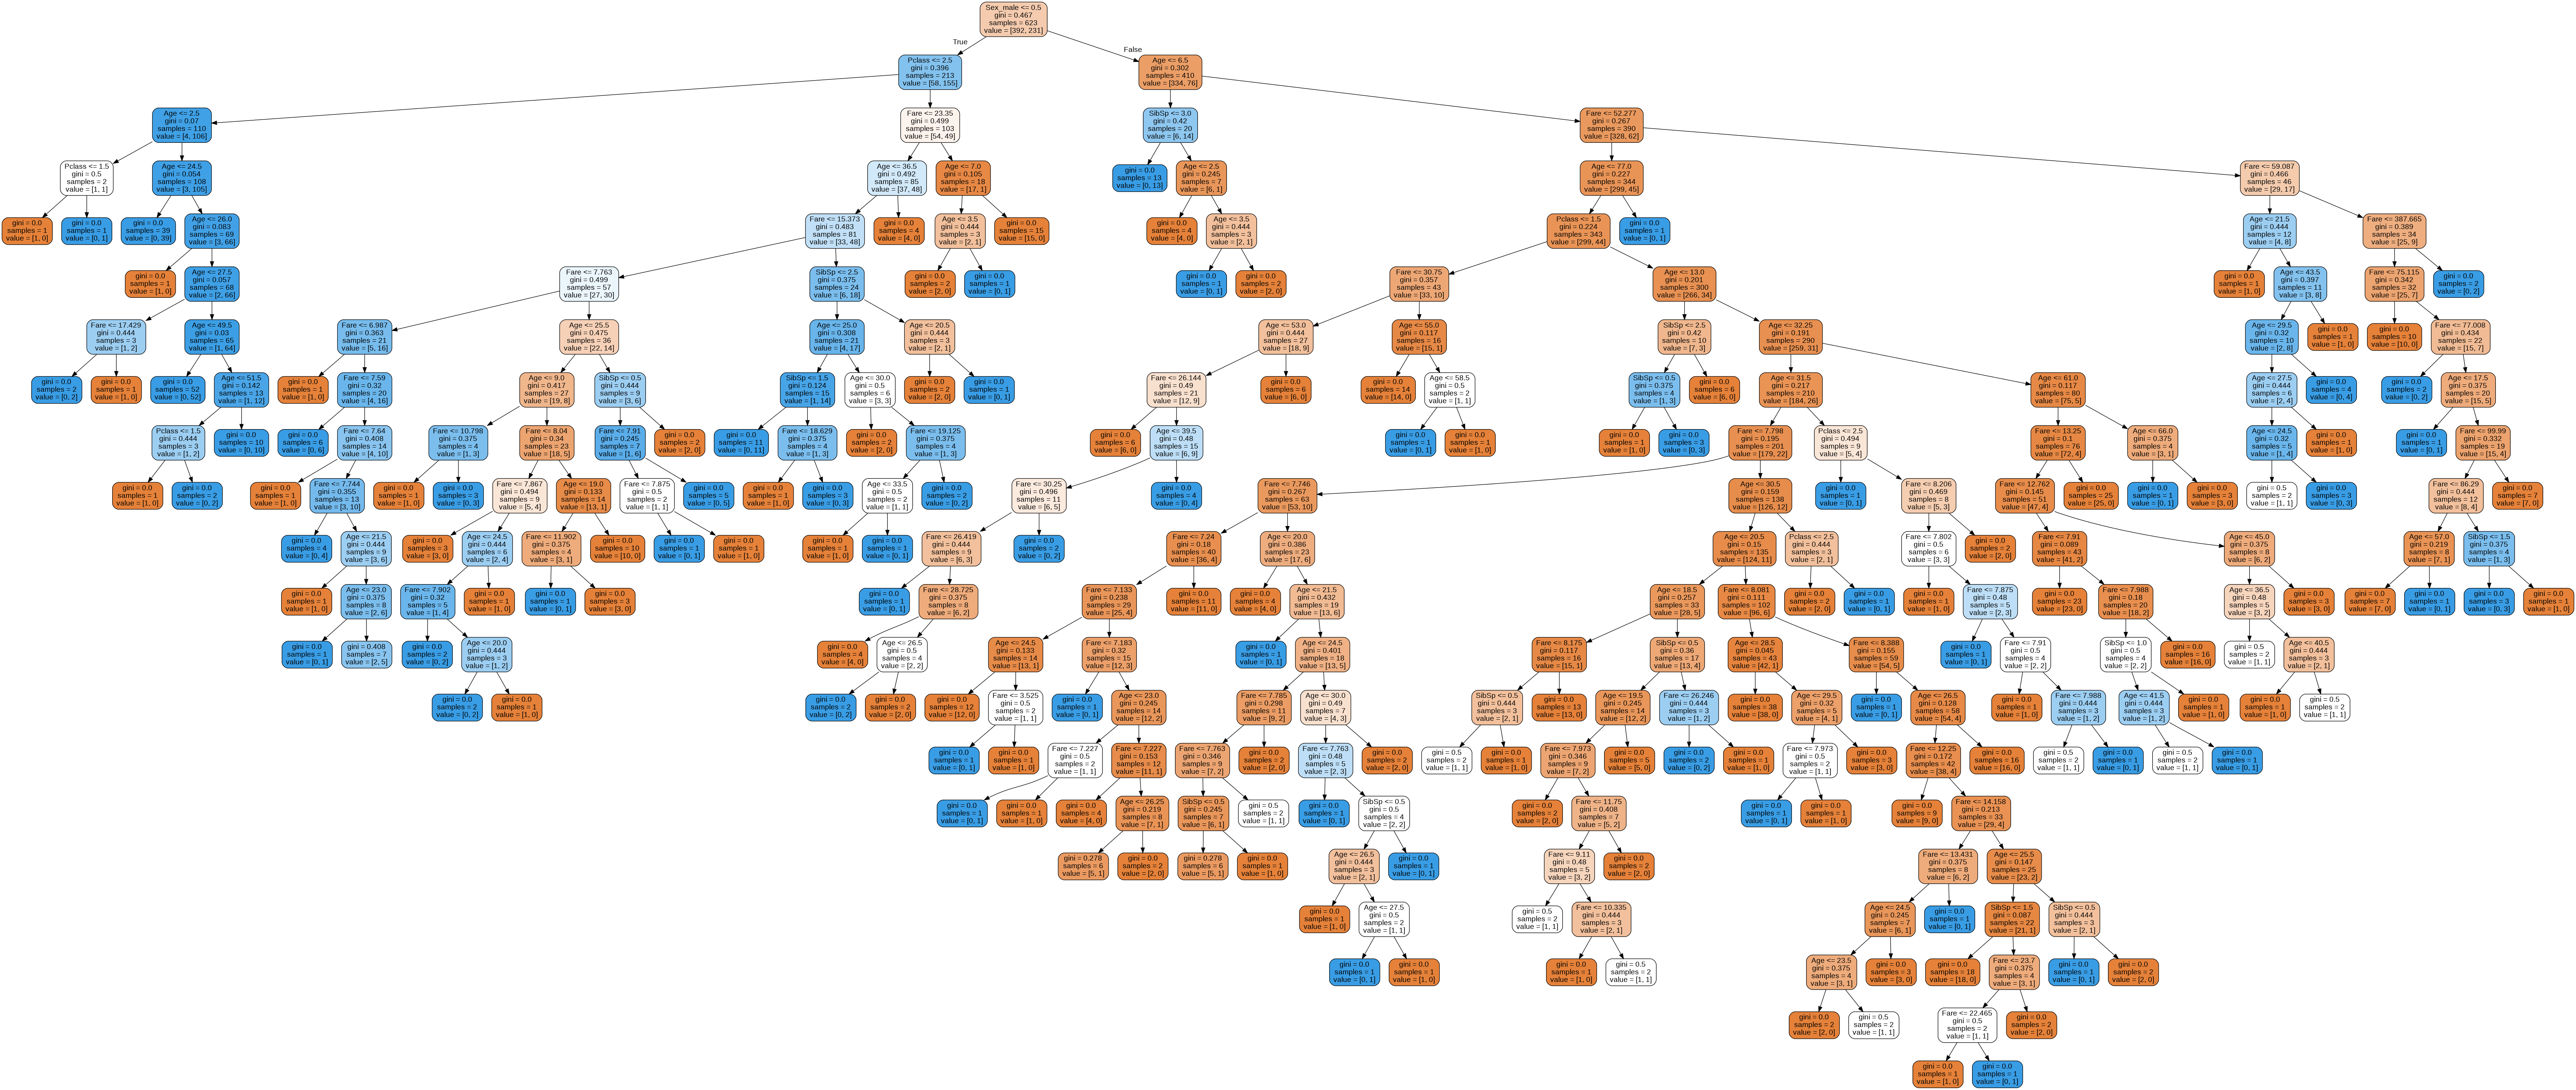

In [18]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [19]:
clf.score(x_train,y_train)

0.9775280898876404

In [20]:
py_pred = clf.predict(x_test)
py_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [21]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7686567164179104

so testing accurcy is less than training accuracy so there is a overfitted model

Hyparameter Tuning


In [22]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)
x_transform

array([[ 0.82737724, -0.49779327,  0.43279337, -0.50244517, -0.73769513,
         0.73769513],
       [-1.56610693,  0.71504807,  0.43279337,  0.78684529,  1.35557354,
        -1.35557354],
       [ 0.82737724, -0.19458293, -0.4745452 , -0.48885426,  1.35557354,
        -1.35557354],
       ...,
       [ 0.82737724, -0.3461881 ,  0.43279337, -0.17626324,  1.35557354,
        -1.35557354],
       [-1.56610693, -0.19458293, -0.4745452 , -0.04438104, -0.73769513,
         0.73769513],
       [ 0.82737724,  0.26023257, -0.4745452 , -0.49237783, -0.73769513,
         0.73769513]])

In [23]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf1 = DecisionTreeClassifier()
clf1.fit(x_train,y_train)
clf1.score(x_test,y_test)

0.753731343283582

same as before

let's use PCA for feature selection and see if it improves our accuracy

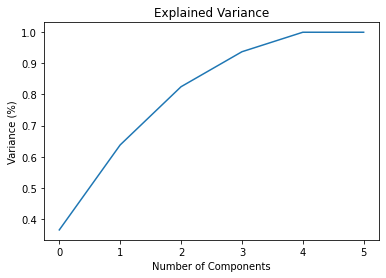

In [24]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 4 components. So instead of giving all 11 columns as input in our algorithm let's use these 4 principal components instead.

In [25]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [26]:
principal_x

PC-1      PC-2      PC-3      PC-4
0   -1.278846 -0.744051  0.503412  0.115115
1    2.489207  0.911856 -0.019482  0.404908
2    1.203732 -1.305778 -1.258889 -0.008495
3    2.359055  0.636886 -0.115056  0.352035
4   -1.389248  0.038147 -0.486031  0.287039
..        ...       ...       ...       ...
886 -1.013196  0.460576 -0.091337 -0.379167
887  2.050529  0.014308 -0.585396 -0.921569
888  1.439952 -1.495223 -0.397372  0.323219
889 -0.545482  1.273921  0.237735 -0.735098
890 -1.394581 -0.089248 -0.411690  0.124136

[891 rows x 4 columns]

In [27]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf2 = DecisionTreeClassifier()
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)

0.7201492537313433

GridSearchCV

In [28]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [29]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [30]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 7, 'min_samples_split': 9, 'splitter': 'random'}


In [31]:
grid_search.best_score_

0.8250451612903225

In [32]:
clf3 = DecisionTreeClassifier(criterion = 'entropy', max_depth =6, min_samples_leaf= 1, min_samples_split= 8, splitter ='random')
clf3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [33]:
clf3.score(x_test,y_test)

0.7835820895522388

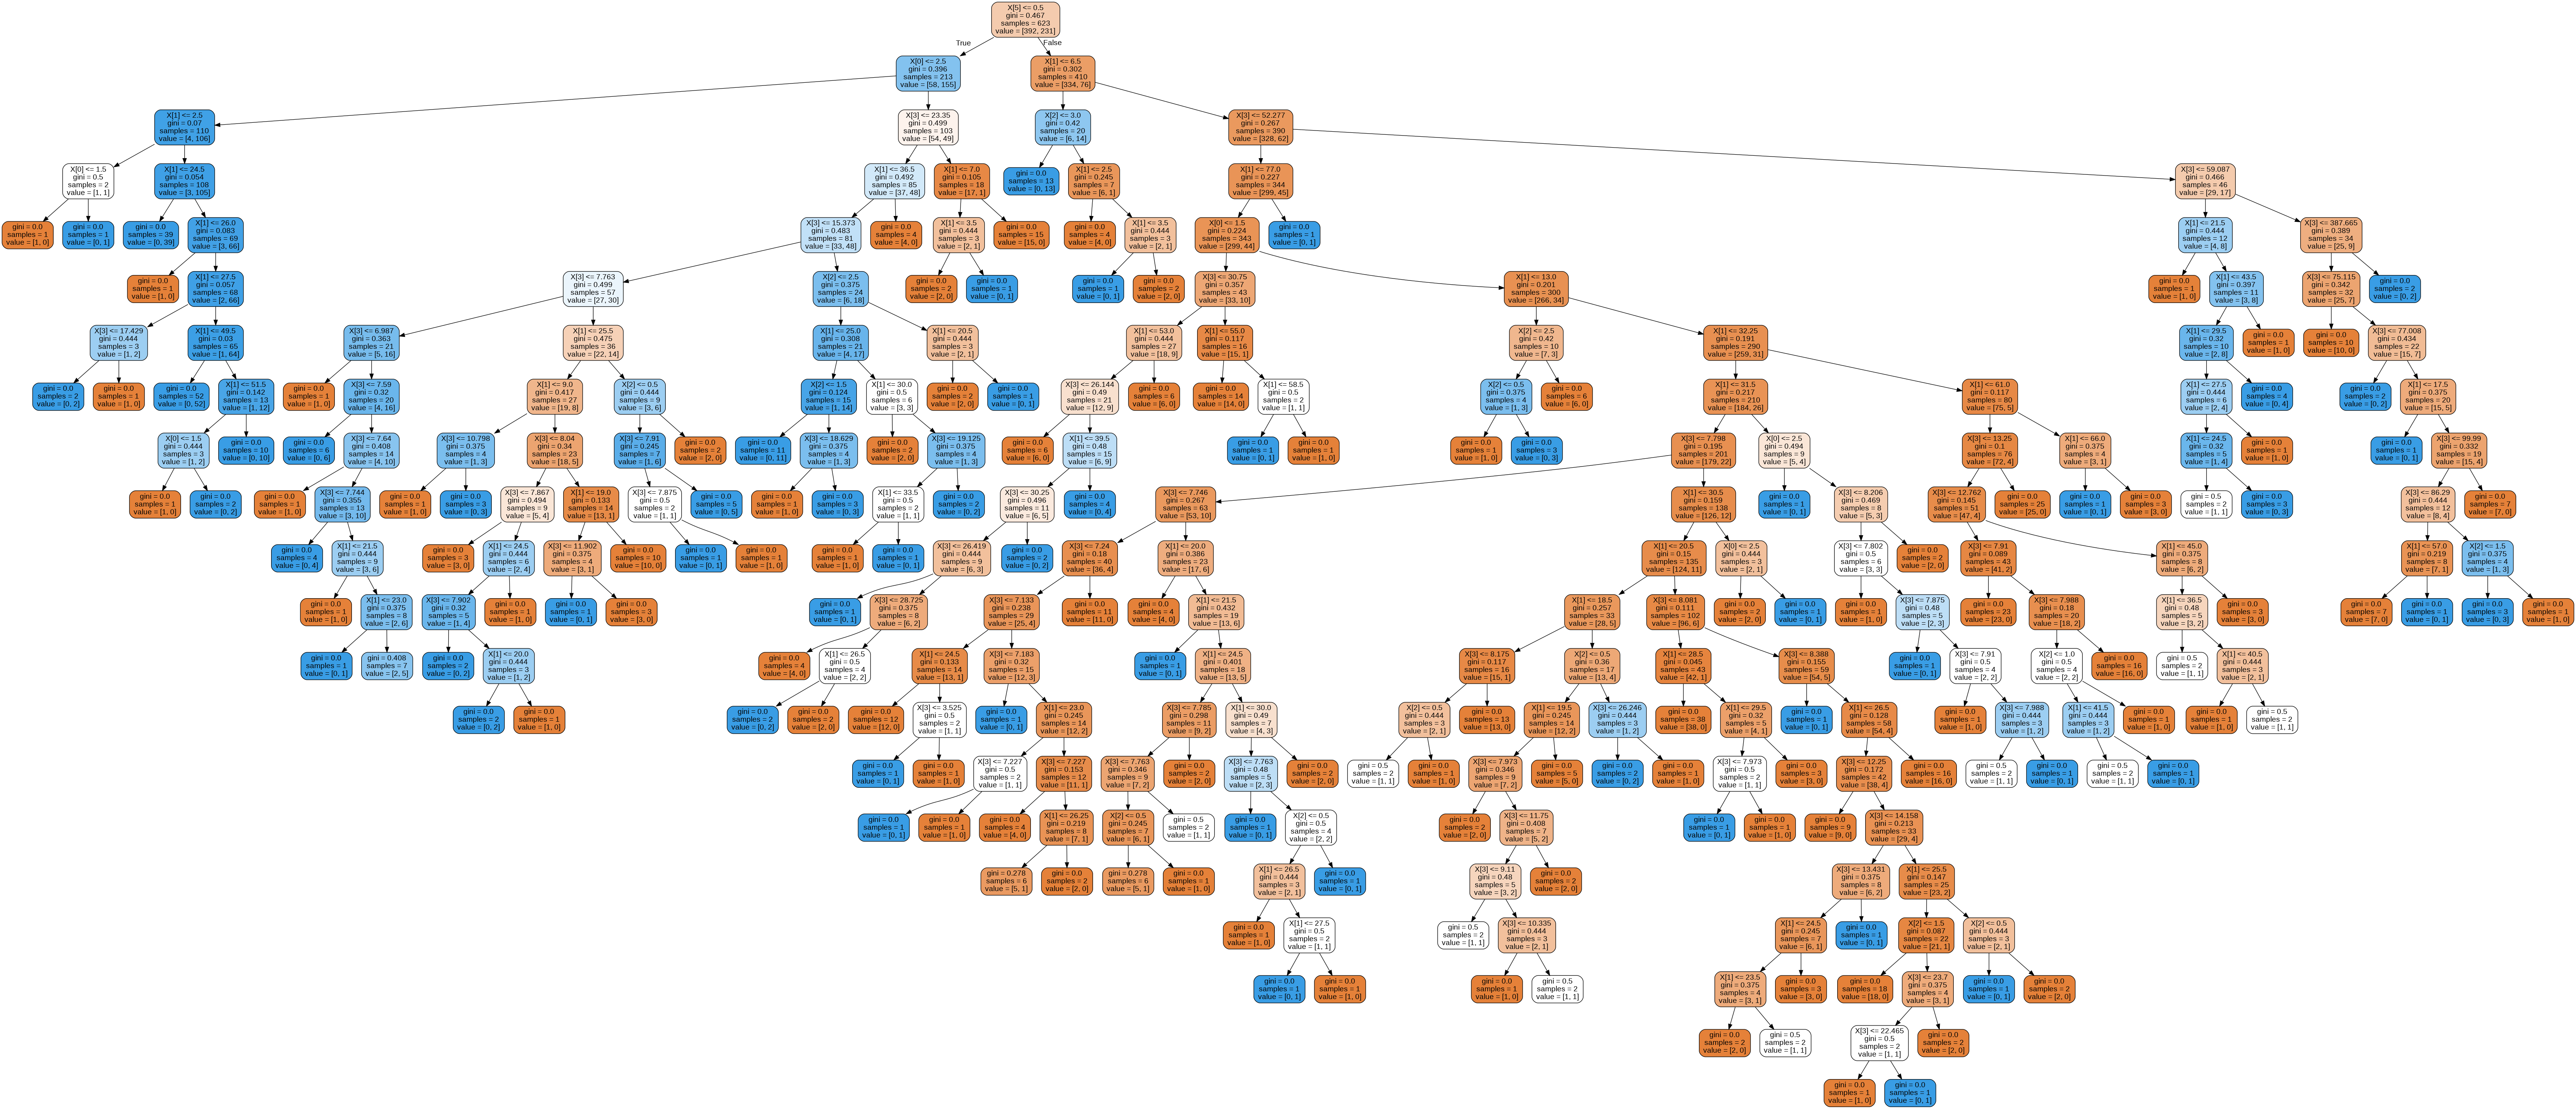

In [34]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [35]:
# let's save the model
import pickle

with open('clf1.sav', 'wb') as f:
    pickle.dump(clf1,f)
    
with open('clf2_pca.sav', 'wb') as f:
    pickle.dump(clf2,f)

with open('clf3_grid.sav', 'wb') as f:
    pickle.dump(clf3,f)

In [36]:
clf3.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1])

In [37]:
x_test

PC-1      PC-2      PC-3      PC-4
426  1.812209 -0.592923 -0.334247  0.330776
302 -1.462709 -0.694517 -0.150828 -0.542095
383  2.351377  0.627808 -0.125508  0.358803
355 -1.386685 -0.241365 -0.292140 -0.106297
678  1.624138 -0.510557 -0.663446  1.222351
..        ...       ...       ...       ...
294 -1.402200 -0.421162 -0.204460 -0.316093
519 -1.393563 -0.088045 -0.410304  0.123239
800 -1.005638  0.752053 -0.271450  0.005248
208  1.191713 -1.723618 -1.003247 -0.556583
373  0.187482  1.979067  1.344316 -1.604690

[268 rows x 4 columns]

In [38]:
clf3.predict([[-1.393563,-0.088045,-0.410304,0.123239]])

array([0])

In [39]:
y_test[519]

0